In [51]:
# Import necessary packages
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os
from dotenv import load_dotenv
pd.options.mode.chained_assignment = None

In [52]:
#load from .env file
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

load_dotenv(f'{parent_dir}/.env')

postgres_password = os.getenv('POSTGRES_PASSWORD')
postgres_port_no = os.getenv('POSTGRES_PORT_NO')
host = os.getenv('POSTGRES_HOST')
database = os.getenv('POSTGRES_DB')
user = os.getenv('POSTGRES_USER')

In [53]:
# Connect to postgres
engine = create_engine(f'postgresql://{user}:{postgres_password}@{host}:{postgres_port_no}/{database}')

## How can we improve customer retention and lifetime value?
### 1) Calculate customer churn rates and identify at-risk customers. 
### 2) Analyze the effectiveness of current retention strategies.


In [55]:
# Query online_sales data into pandas dataframe
sales_df = pd.read_sql("SELECT * FROM online_sales", engine)
sales_df.drop(['delivery_charges'], axis=1, inplace=True)
sales_df

,cust_id,transaction_id,date,product_id,coupon_status,coupon_code,discount_percentage,quantity
0,12346,38223,2019-09-15,B0B2RBP83P,Used,OFF30,0.3,2
1,12346,38223,2019-09-15,B0B6F7LX4C,Used,SALE30,0.3,1
2,12347,23979,2019-03-24,B00LZLQ624,Used,OFF30,0.3,1
3,12347,23979,2019-03-24,B095X38CJS,Not Used,OFF30,0.3,1
4,12347,23980,2019-03-24,B00Y4ORQ46,Not Used,ELEC30,0.3,5
...,...,...,...,...,...,...,...,...
50452,18283,40289,2019-10-10,B0B9XLX8VR,Used,SALE10,0.1,1
50453,18283,40290,2019-10-10,B07LFWP97N,Used,SALE10,0.1,1
50454,18283,40290,2019-10-10,B07Z1X6VFC,Used,SALE10,0.1,2
50455,18283,40291,2019-10-10,B01JOFKL0A,Not Used,SALE10,0.1,1


In [56]:
# Query products data into pandas dataframe
products_df = pd.read_sql("SELECT * FROM products", engine)
products_df.drop(['about_product', 'discounted_price', 'discount_percentage'], axis=1, inplace=True)
products_df

,product_id,product_name,category,actual_price,origin_area,img_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,13.19,None,https://m.media-amazon.com/images/W/WEBP_40237...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.19,None,https://m.media-amazon.com/images/W/WEBP_40237...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,22.79,None,https://m.media-amazon.com/images/W/WEBP_40237...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,8.39,None,https://m.media-amazon.com/images/I/41V5FtEWPk...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.79,None,https://m.media-amazon.com/images/W/WEBP_40237...
...,...,...,...,...,...,...
1346,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,11.03,None,https://m.media-amazon.com/images/I/41fDdRtjfx...
1347,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,36.54,None,https://m.media-amazon.com/images/I/41gzDxk4+k...
1348,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",36.96,None,https://m.media-amazon.com/images/W/WEBP_40237...
1349,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",22.68,None,https://m.media-amazon.com/images/W/WEBP_40237...


In [57]:
# Left join on both dataframes
df_2019 = pd.merge(sales_df, products_df, on='product_id', how='left')

# Reorder columns
df_2019 = df_2019[['cust_id', 'transaction_id', 'date', 'product_id', 'product_name', 'category', 'coupon_code',
         'coupon_status', 'discount_percentage', 'quantity', 'actual_price']]
df_2019 = df_2019.rename(columns={'cust_id': 'user_id'})
df_2019

,user_id,transaction_id,date,product_id,product_name,category,coupon_code,coupon_status,discount_percentage,quantity,actual_price
0,12346,38223,2019-09-15,B0B2RBP83P,"Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6"" ...",Computers&Accessories|Laptops|TraditionalLaptops,OFF30,Used,0.3,2,718.68
1,12346,38223,2019-09-15,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",SALE30,Used,0.3,1,299.99
2,12347,23979,2019-03-24,B00LZLQ624,Classmate Soft Cover 6 Subject Spiral Binding ...,OfficeProducts|OfficePaperProducts|Paper|Stati...,OFF30,Used,0.3,1,1.92
3,12347,23979,2019-03-24,B095X38CJS,BRUSTRO Copytinta Coloured Craft Paper A4 Size...,OfficeProducts|OfficePaperProducts|Paper|Copy&...,OFF30,Not Used,0.3,1,1.19
4,12347,23980,2019-03-24,B00Y4ORQ46,Logitech H111 Wired On Ear Headphones With Mic...,"Electronics|Headphones,Earbuds&Accessories|Hea...",ELEC30,Not Used,0.3,5,9.54
...,...,...,...,...,...,...,...,...,...,...,...
50452,18283,40289,2019-10-10,B0B9XLX8VR,VU 139 cm (55 inches) The GloLED Series 4K Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",SALE10,Used,0.1,1,780.00
50453,18283,40290,2019-10-10,B07LFWP97N,Gizga Essentials Laptop Bag Sleeve Case Cover ...,Computers&Accessories|Accessories&Peripherals|...,SALE10,Used,0.1,1,13.19
50454,18283,40290,2019-10-10,B07Z1X6VFC,AirCase Protective Laptop Bag Sleeve fits Upto...,Computers&Accessories|Accessories&Peripherals|...,SALE10,Used,0.1,2,11.99
50455,18283,40291,2019-10-10,B01JOFKL0A,Canon PIXMA E477 All-in-One Wireless Ink Effic...,"Computers&Accessories|Printers,Inks&Accessorie...",SALE10,Not Used,0.1,1,76.26


In [58]:
# Add a Quarter column
df_2019['date'] = pd.to_datetime(df_2019['date'])
position = df_2019.columns.get_loc('date') + 1
df_2019.insert(loc=position, column='quarter', value= df_2019['date'].dt.quarter)
df_2019

,user_id,transaction_id,date,quarter,product_id,product_name,category,coupon_code,coupon_status,discount_percentage,quantity,actual_price
0,12346,38223,2019-09-15,3,B0B2RBP83P,"Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6"" ...",Computers&Accessories|Laptops|TraditionalLaptops,OFF30,Used,0.3,2,718.68
1,12346,38223,2019-09-15,3,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",SALE30,Used,0.3,1,299.99
2,12347,23979,2019-03-24,1,B00LZLQ624,Classmate Soft Cover 6 Subject Spiral Binding ...,OfficeProducts|OfficePaperProducts|Paper|Stati...,OFF30,Used,0.3,1,1.92
3,12347,23979,2019-03-24,1,B095X38CJS,BRUSTRO Copytinta Coloured Craft Paper A4 Size...,OfficeProducts|OfficePaperProducts|Paper|Copy&...,OFF30,Not Used,0.3,1,1.19
4,12347,23980,2019-03-24,1,B00Y4ORQ46,Logitech H111 Wired On Ear Headphones With Mic...,"Electronics|Headphones,Earbuds&Accessories|Hea...",ELEC30,Not Used,0.3,5,9.54
...,...,...,...,...,...,...,...,...,...,...,...,...
50452,18283,40289,2019-10-10,4,B0B9XLX8VR,VU 139 cm (55 inches) The GloLED Series 4K Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",SALE10,Used,0.1,1,780.00
50453,18283,40290,2019-10-10,4,B07LFWP97N,Gizga Essentials Laptop Bag Sleeve Case Cover ...,Computers&Accessories|Accessories&Peripherals|...,SALE10,Used,0.1,1,13.19
50454,18283,40290,2019-10-10,4,B07Z1X6VFC,AirCase Protective Laptop Bag Sleeve fits Upto...,Computers&Accessories|Accessories&Peripherals|...,SALE10,Used,0.1,2,11.99
50455,18283,40291,2019-10-10,4,B01JOFKL0A,Canon PIXMA E477 All-in-One Wireless Ink Effic...,"Computers&Accessories|Printers,Inks&Accessorie...",SALE10,Not Used,0.1,1,76.26


In [59]:
#Generating synthetic data for 2018

# Set seed for reproducibility
np.random.seed(3101)

# Number of synthetic transactions for 2018
n_transactions = len(df_2019)

# Generate synthetic transaction IDs (unique)
transaction_ids = np.arange(1, n_transactions + 1)

# Generate random dates in 2018
start_date = pd.to_datetime("2018-01-01")
end_date = pd.to_datetime("2018-12-31")
transaction_dates = start_date + (end_date - start_date) * np.random.rand(n_transactions)

# Generate synthetic product_ids sampled from the 2019 data
product_ids = np.random.choice(df_2019['product_id'].unique(), size=n_transactions)

# Generate synthetic quantities
quantities = np.random.randint(1, np.percentile(df_2019['quantity'], 90) + 1, size=n_transactions)

# Create the synthetic 2018 dataset
df_2018 = pd.DataFrame({
    'transaction_id': transaction_ids,
    'date': transaction_dates,
    'product_id': product_ids,
    'quantity': quantities,
})

# Left join with the products table
df_2018 = pd.merge(df_2018, products_df, on='product_id', how='left')

# Reorder columns
df_2018 = df_2018[['transaction_id', 'date', 'product_id', 'product_name', 'category', 'quantity', 'actual_price']]

# Add quarter column
df_2018.insert(loc=df_2018.columns.get_loc('date') + 1, column='quarter', value= df_2018['date'].dt.quarter)

# Add empty columns to simulate no coupon strategy is used

df_2018.insert(loc = df_2018.columns.get_loc('category') + 1, column='coupon_code', value=np.nan)
df_2018.insert(loc = df_2018.columns.get_loc('coupon_code') + 1, column='coupon_status', value=np.nan)
df_2018.insert(loc = df_2018.columns.get_loc('coupon_status') + 1, column='discount_percentage', value=0)

# Generate synthetic user_ids based on 2019 data

# Create a dictionary with unique user_ids for each quarter in 2019

unique_users_per_quarter_2019 = df_2019.groupby('quarter')['user_id'].unique().to_dict()

# Create a function to assign similar user ids which appears in each quarter in 2019 to each quarter in 2018.
def assign_user_ids(row):
    quarter = row['quarter']
    unique_users = unique_users_per_quarter_2019.get(quarter, [])
    return np.random.choice(unique_users, size=1)[0]

# Assign user ids
df_2018.insert(loc = 0, column = 'user_id', value=df_2018.apply(assign_user_ids, axis=1))

# Randomly remove 20% of rows to simulate poorer performance due to no retention strategy

df_2018= df_2018.sample(frac=0.8, random_state=42)
df_2018 = df_2018.reset_index(drop=True)
df_2018

,user_id,transaction_id,date,quarter,product_id,product_name,category,coupon_code,coupon_status,discount_percentage,quantity,actual_price
0,14368,45290,2018-12-22 16:31:32.219385020,4,B08461VC1Z,"Scarters Mouse Pad, Desk Mat Extended for Work...",Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0,2,23.94
1,15885,43254,2018-10-11 04:52:00.960872240,4,B0B2PQL5N3,"Lapster Gel Mouse pad with Wrist Rest , Gaming...",Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0,5,11.99
2,14755,3222,2018-07-18 01:32:57.298202616,3,B0B2DJ5RVQ,WeCool B1 Mobile Holder for Bikes or Bike Mobi...,Electronics|Mobiles&Accessories|MobileAccessor...,NaN,NaN,0,1,23.99
3,14487,4885,2018-02-08 03:36:18.889764714,1,B01JOFKL0A,Canon PIXMA E477 All-in-One Wireless Ink Effic...,"Computers&Accessories|Printers,Inks&Accessorie...",NaN,NaN,0,4,76.26
4,14496,18981,2018-01-13 19:57:10.621032366,1,B00C3GBCIS,GIZGA Club-laptop Neoprene Reversible for 15.6...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0,5,5.99
...,...,...,...,...,...,...,...,...,...,...,...,...
40361,18011,19318,2018-01-07 18:30:25.625782681,1,B07XJYYH7L,Wecool Nylon Braided Multifunction Fast Chargi...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0,3,11.99
40362,15288,7929,2018-04-18 02:50:01.558972594,2,B00Y4ORQ46,Logitech H111 Wired On Ear Headphones With Mic...,"Electronics|Headphones,Earbuds&Accessories|Hea...",NaN,NaN,0,1,9.54
40363,16203,2108,2018-03-20 20:51:59.529268751,1,B07XLML2YS,TP-Link Tapo 360° 2MP 1080p Full HD Pan/Tilt H...,Electronics|Cameras&Photography|SecurityCamera...,NaN,NaN,0,3,39.59
40364,17890,30364,2018-06-20 07:28:36.657637366,2,B0BF54LXW6,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,NaN,NaN,0,4,239.99


In [60]:
#Combine 2018 and 2019 dataframe into a single dataframe
df = pd.concat([df_2018, df_2019], ignore_index=True)
df

,user_id,transaction_id,date,quarter,product_id,product_name,category,coupon_code,coupon_status,discount_percentage,quantity,actual_price
0,14368,45290,2018-12-22 16:31:32.219385020,4,B08461VC1Z,"Scarters Mouse Pad, Desk Mat Extended for Work...",Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0.0,2,23.94
1,15885,43254,2018-10-11 04:52:00.960872240,4,B0B2PQL5N3,"Lapster Gel Mouse pad with Wrist Rest , Gaming...",Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0.0,5,11.99
2,14755,3222,2018-07-18 01:32:57.298202616,3,B0B2DJ5RVQ,WeCool B1 Mobile Holder for Bikes or Bike Mobi...,Electronics|Mobiles&Accessories|MobileAccessor...,NaN,NaN,0.0,1,23.99
3,14487,4885,2018-02-08 03:36:18.889764714,1,B01JOFKL0A,Canon PIXMA E477 All-in-One Wireless Ink Effic...,"Computers&Accessories|Printers,Inks&Accessorie...",NaN,NaN,0.0,4,76.26
4,14496,18981,2018-01-13 19:57:10.621032366,1,B00C3GBCIS,GIZGA Club-laptop Neoprene Reversible for 15.6...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0.0,5,5.99
...,...,...,...,...,...,...,...,...,...,...,...,...
90818,18283,40289,2019-10-10 00:00:00.000000000,4,B0B9XLX8VR,VU 139 cm (55 inches) The GloLED Series 4K Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",SALE10,Used,0.1,1,780.00
90819,18283,40290,2019-10-10 00:00:00.000000000,4,B07LFWP97N,Gizga Essentials Laptop Bag Sleeve Case Cover ...,Computers&Accessories|Accessories&Peripherals|...,SALE10,Used,0.1,1,13.19
90820,18283,40290,2019-10-10 00:00:00.000000000,4,B07Z1X6VFC,AirCase Protective Laptop Bag Sleeve fits Upto...,Computers&Accessories|Accessories&Peripherals|...,SALE10,Used,0.1,2,11.99
90821,18283,40291,2019-10-10 00:00:00.000000000,4,B01JOFKL0A,Canon PIXMA E477 All-in-One Wireless Ink Effic...,"Computers&Accessories|Printers,Inks&Accessorie...",SALE10,Not Used,0.1,1,76.26


In [61]:
#Create a total_spent column to indicate how much a customer spends each transaction

df['total_spent'] = df.apply(
    lambda row: row['actual_price'] * row['quantity'] * (1 - row['discount_percentage'])
    if row['coupon_status'] == "Used" else row['actual_price'] * row['quantity'], axis=1)
df

,user_id,transaction_id,date,quarter,product_id,product_name,category,coupon_code,coupon_status,discount_percentage,quantity,actual_price,total_spent
0,14368,45290,2018-12-22 16:31:32.219385020,4,B08461VC1Z,"Scarters Mouse Pad, Desk Mat Extended for Work...",Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0.0,2,23.94,47.880
1,15885,43254,2018-10-11 04:52:00.960872240,4,B0B2PQL5N3,"Lapster Gel Mouse pad with Wrist Rest , Gaming...",Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0.0,5,11.99,59.950
2,14755,3222,2018-07-18 01:32:57.298202616,3,B0B2DJ5RVQ,WeCool B1 Mobile Holder for Bikes or Bike Mobi...,Electronics|Mobiles&Accessories|MobileAccessor...,NaN,NaN,0.0,1,23.99,23.990
3,14487,4885,2018-02-08 03:36:18.889764714,1,B01JOFKL0A,Canon PIXMA E477 All-in-One Wireless Ink Effic...,"Computers&Accessories|Printers,Inks&Accessorie...",NaN,NaN,0.0,4,76.26,305.040
4,14496,18981,2018-01-13 19:57:10.621032366,1,B00C3GBCIS,GIZGA Club-laptop Neoprene Reversible for 15.6...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,0.0,5,5.99,29.950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90818,18283,40289,2019-10-10 00:00:00.000000000,4,B0B9XLX8VR,VU 139 cm (55 inches) The GloLED Series 4K Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",SALE10,Used,0.1,1,780.00,702.000
90819,18283,40290,2019-10-10 00:00:00.000000000,4,B07LFWP97N,Gizga Essentials Laptop Bag Sleeve Case Cover ...,Computers&Accessories|Accessories&Peripherals|...,SALE10,Used,0.1,1,13.19,11.871
90820,18283,40290,2019-10-10 00:00:00.000000000,4,B07Z1X6VFC,AirCase Protective Laptop Bag Sleeve fits Upto...,Computers&Accessories|Accessories&Peripherals|...,SALE10,Used,0.1,2,11.99,21.582
90821,18283,40291,2019-10-10 00:00:00.000000000,4,B01JOFKL0A,Canon PIXMA E477 All-in-One Wireless Ink Effic...,"Computers&Accessories|Printers,Inks&Accessorie...",SALE10,Not Used,0.1,1,76.26,76.260


In [62]:
# Create a column to show year and quarter

df['year_quarter'] = df['date'].dt.to_period('Q')

# Count number of unique users in each year and quarter

grouped_df = df.groupby('year_quarter')['user_id'].nunique().reset_index()

# Rename the columns for clarity

grouped_df.columns = ['year_quarter', 'unique_users']
grouped_df

,year_quarter,unique_users
0,2018Q1,488
1,2018Q2,587
2,2018Q3,603
3,2018Q4,550
4,2019Q1,488
5,2019Q2,587
6,2019Q3,603
7,2019Q4,550


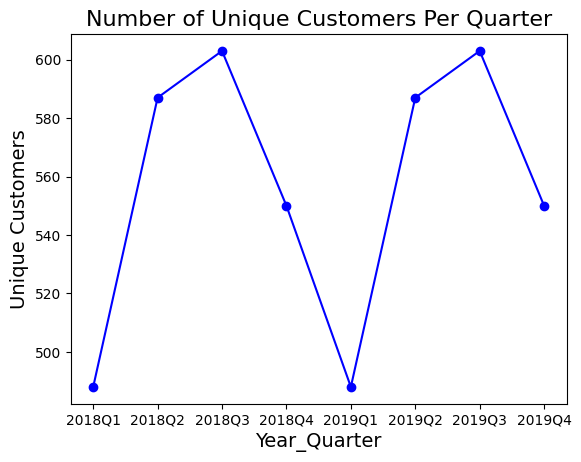

In [63]:
# Line plot for number of unique users in each year_quarter

plt.plot(grouped_df['year_quarter'].astype(str), grouped_df['unique_users'], marker='o', linestyle='-', color='b')
plt.title('Number of Unique Customers Per Quarter', fontsize=16)
plt.xlabel('Year_Quarter', fontsize=14)
plt.ylabel('Unique Customers', fontsize=14)
plt.show()

## Calculating churn rates

In [64]:
# Churn rate will be defined quarterly. 
# A user that makes a transaction in the previous quarter but not in the next quarter will be marked as churned.

# Group unique users into the respective year and quarter
customers_per_quarter = df.groupby('year_quarter')['user_id'].unique().reset_index()

# Define a function to calculate churn rate

def calculate_churn_rate(customers_per_quarter):
    churn_rates = []
    
    for i in range(1, len(customers_per_quarter)):
        current_customers = set(customers_per_quarter['user_id'].iloc[i])
        previous_customers = set(customers_per_quarter['user_id'].iloc[i - 1])
        
        #Taking a set difference to identify customers present in the previous quarter but not in the current quarter
        churned_customers = previous_customers - current_customers
        
        # Churn rate: percentage of previous customers who churned
        churn_rate = len(churned_customers) / len(previous_customers)
        
        churn_rates.append({
            'year_quarter': customers_per_quarter['year_quarter'].iloc[i],
            'churn_rate': churn_rate
        })
    
    return pd.DataFrame(churn_rates)

#Calculate churn rate per quarter

churn_rate_df = calculate_churn_rate(customers_per_quarter)

churn_rate_df

,year_quarter,churn_rate
0,2018Q2,0.641393
1,2018Q3,0.633731
2,2018Q4,0.691542
3,2019Q1,0.756364
4,2019Q2,0.641393
5,2019Q3,0.633731
6,2019Q4,0.691542


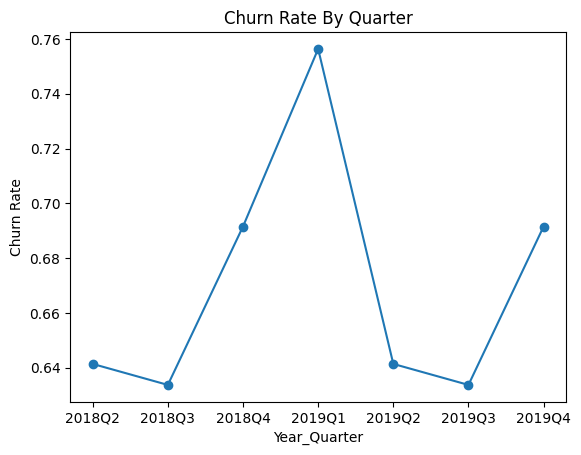

In [65]:
# Plot line graph to show churn rate from 2018 to 2019

churn_rate_df['year_quarter'] = churn_rate_df['year_quarter'].astype(str)

plt.plot(churn_rate_df['year_quarter'], churn_rate_df['churn_rate'], marker='o')
plt.title('Churn Rate By Quarter')  # Set the title
plt.xlabel('Year_Quarter')  # Set the x-label
plt.ylabel('Churn Rate')  # Set the y-label
plt.xticks(churn_rate_df['year_quarter'])  # Ensure all quarters are displayed
plt.show() 

## Identify at risk customers

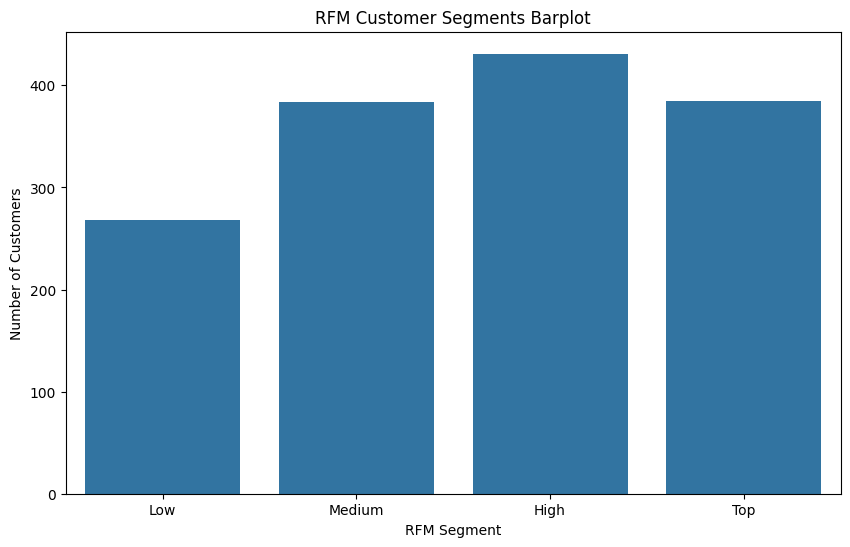

In [66]:
# RFM analysis from purchasing behavior analysis

df['total_spent'] = df['total_spent'].astype(float)

# Set a dummy reference date for recency calculations
reference_date = pd.to_datetime('2024-10-05')

rfm = df.groupby('user_id').agg({
    'date': lambda x: (reference_date - x.max()).days,  
    'transaction_id': 'count',                         
    'total_spent': 'sum'                             
}).reset_index()

rfm.columns = ['user_id', 'Recency', 'Frequency', 'Monetary']

# Rank each customer for Recency, Frequency, and Monetary
rfm['Recency_rank'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['Frequency_rank'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['Monetary_rank'] = pd.qcut(rfm['Monetary'].astype(float), 5, labels=[1, 2, 3, 4, 5])  # Ensuring Monetary is float

rfm['RFM_Score'] = rfm['Recency_rank'].astype(int) + rfm['Frequency_rank'].astype(int) + rfm['Monetary_rank'].astype(int)

# Customer segmentation based on RFM score
rfm['Segment'] = pd.cut(rfm['RFM_Score'], bins=[2, 5, 8, 11, 15], labels=['Low', 'Medium', 'High', 'Top'])

# Bar plot for RFM segment counts
rfm_segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=rfm_segment_counts.index, y=rfm_segment_counts.values)
plt.title('RFM Customer Segments Barplot')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.show()


Customers with low RFM scores, reflecting infrequent, low-value purchases or long inactivity, will fall into the Low segment. These customers are identified to be at risk customers.

In [67]:
# User ID's of the at risk customers

user_risk = rfm[rfm['Segment'] == 'Low']['user_id']
user_risk = user_risk.tolist()

In [68]:
# Calculating Customer Lifetime Value (CLTV)

df['year'] = df['date'].dt.year

customer_data = df.groupby(['user_id', 'year']).agg({
    'transaction_id': 'count',           # Number of orders (Frequency)
    'total_spent': 'sum',                  # Total revenue (Monetary)
    'date': ['min', 'max'],                # Recency
    'product_id': 'nunique',               # Number of unique products purchased
}).reset_index()


customer_data.columns = ['user_id', 'year', 'total_orders', 'total_spent', 'first_purchase', 'last_purchase', 'unique_products']

customer_2018 = customer_data[customer_data['year'] == 2018]
customer_2019 = customer_data[customer_data['year'] == 2019]

In [69]:
# Calculate average order value (AOV)
# The AOV is the ratio of the total revenue and the total number of orders. It represents the amount of revenue 
# a customer spends on an order.

customer_2018['AOV'] = customer_2018['total_spent'] / customer_2018['total_orders']
customer_2019['AOV'] = customer_2019['total_spent'] / customer_2019['total_orders']

In [70]:
# Calculate Purchase frequency (orders per day)
# Purchase frequency is the ratio of the total number of orders and the total number of customers. It represents the
# average number of orders placed by each customer.

purchase_frequency_2018 = sum(customer_2018['total_orders'])/customer_2018.shape[0]
purchase_frequency_2019 = sum(customer_2019['total_orders'])/customer_2019.shape[0]
print(f"Purchase Frequency 2018: {purchase_frequency_2018}")
print(f"Purchase Frequency 2019: {purchase_frequency_2019}")

Purchase Frequency 2018: 27.497275204359674
Purchase Frequency 2019: 34.37125340599455


In [71]:
# Count the number of purchases per customer

customer_type_2018 = df[df['year'] == 2018].groupby('user_id').agg(total_orders=('transaction_id', 'count')).reset_index()
customer_type_2019 = df[df['year'] == 2019].groupby('user_id').agg(total_orders=('transaction_id', 'count')).reset_index()

# Classify customers as 'repeat' or 'one-time'

customer_type_2018['type'] = customer_type_2018['total_orders'].apply(lambda x: 'repeat' if x > 1 else 'one-time')
customer_type_2019['type'] = customer_type_2019['total_orders'].apply(lambda x: 'repeat' if x > 1 else 'one-time')

In [72]:
# Customer lifetime is the period of time that the customer has been ordering
# customer lifetime = 1 / churn rate

# We will take the mean of churn rate in 2018 and 2019

churn_rate_2018 = churn_rate_df['churn_rate'].iloc[:4].mean()
churn_rate_2019 = churn_rate_df['churn_rate'].iloc[4:8].mean()

# Calculate Customer Lifetime

customer_lifetime_2018 = 1/churn_rate_2018
customer_lifetime_2019 = 1/churn_rate_2019

print(f"Customer Lifetime 2018: {customer_lifetime_2018}")
print(f"Customer Lifetime 2019: {customer_lifetime_2019}")


Customer Lifetime 2018: 1.4689517569897452
Customer Lifetime 2019: 1.525423806946429


In [73]:
# Calculate Profit Margin
# Take Amazon's sellers have a profit margin of 20% based on research 

customer_2018['profit_margin'] = customer_2018['total_spent']*0.2
customer_2019['profit_margin'] = customer_2019['total_spent']*0.2

In [74]:
# Calculate CLTV
customer_2018['CLTV'] = ((customer_2018['AOV']*purchase_frequency_2018)/churn_rate_2018) * customer_2018['profit_margin']
customer_2019['CLTV'] = ((customer_2019['AOV']*purchase_frequency_2019)/churn_rate_2019) * customer_2019['profit_margin']

## Analyze the effectiveness of the coupon retention strategy

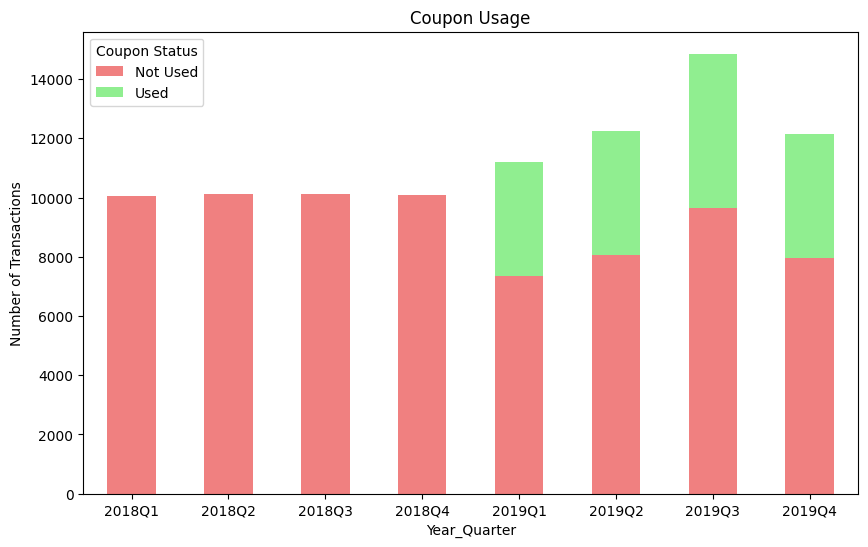

In [75]:
# Plot a stacked bar chart to show user's response to the coupon retention strategy in 2019

# Replace NaN values with "Not Used" in 2018 Coupon_Status
df['coupon_status'] = df['coupon_status'].fillna('Not Used')

# Count coupons used or not used by year and quarter
coupon_counts = df.groupby(['year_quarter', 'coupon_status']).size().unstack()

# Plot the stacked bar chart

coupon_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'lightgreen'])

plt.title('Coupon Usage')
plt.xlabel('Year_Quarter')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=360)
plt.legend(title='Coupon Status', loc = 'upper left')
plt.show()

From the stacked bar chart, we can see that the number of transactions is higher in 2019, after the retention strategy (Coupon) is applied.

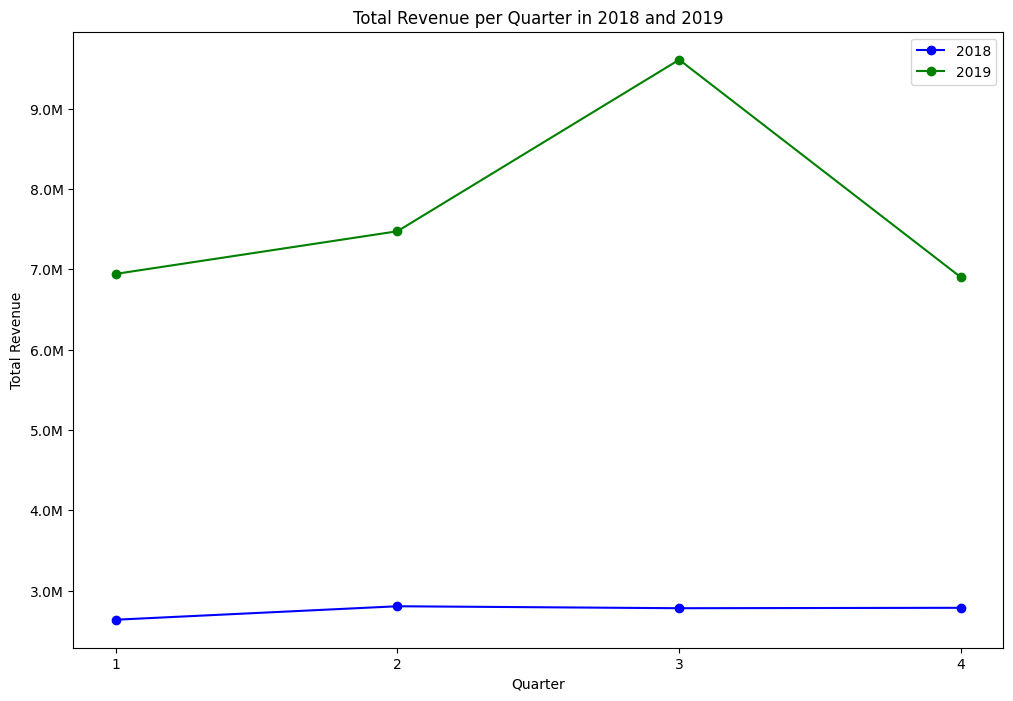

In [76]:
# Compare total revenue between 2018 and 2019

# Filter 2018 and 2019 data into seperate dataframes
revenue_2018 = df[df['date'].dt.year == 2018]
revenue_2019 = df[df['date'].dt.year == 2019]

# Calculate sum of revenue by quarter in each year
revenue_2018 = revenue_2018.groupby('quarter')['total_spent'].sum()
revenue_2019 = revenue_2019.groupby('quarter')['total_spent'].sum()

# Set plot size

plt.figure(figsize=(12, 8))

# Plot the revenue for 2018

plt.plot(revenue_2018.index.astype(str), revenue_2018.values, label='2018', color='blue', marker='o')

# Plot the revenue for 2019

plt.plot(revenue_2019.index.astype(str), revenue_2019.values, label='2019', color='green', marker='o')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M'))
plt.title('Total Revenue per Quarter in 2018 and 2019')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(rotation=360)
plt.legend()
plt.show()

From the line graph, we see that after the coupon retention strategy is used in 2019, total revenue by quarter increases with respect to the total revenue in 2018.

In [77]:
# Compare CLTV for each user between 2018 and 2019

selected_2019 = customer_2019[['user_id', 'CLTV']]
customer_df = pd.merge(customer_2018, selected_2019, on='user_id', how='left' ,suffixes=('_2018', '_2019'))

# Take difference of CLTV. Positive value indicates that CLTV increased in 2019 for that user

customer_df['CLTV_increase'] = customer_df['CLTV_2019'] - customer_df['CLTV_2018']

# Find percentage of users whose CLTV increased

positive_count = (customer_df['CLTV_increase'] > 0).sum()
total_count = len(customer_df)
percentage_positive = (positive_count / total_count) * 100
print(f"Percentage of users with an increase in CLTV: {percentage_positive:.2f}%")

Percentage of users with an increase in CLTV: 51.43%


In [78]:
churn_rate_df

,year_quarter,churn_rate
0,2018Q2,0.641393
1,2018Q3,0.633731
2,2018Q4,0.691542
3,2019Q1,0.756364
4,2019Q2,0.641393
5,2019Q3,0.633731
6,2019Q4,0.691542


In terms of the total number of transactions and revenue, 2019 performed better than 2018 after the coupon strategy is applied. There is also an increase in CLTV for about 51% of users from 2018 to 2019. This could mean that the coupon strategy is generally effective in improving customer lifetime value.

However, when we look at the churn rate, churn rate is relatively similar over the quarters from 2018 to 2019. This could mean that the coupon strategy was not effective in customer retention. Instead, it might have helped encourage customers to make more purchases and in higher quantities, leading to a higher total number of transactions, revenue and customer lifetime value.

Due to data limitations, we are unable to assess whether the coupon strategy has led to more new users making transactions. Instead, we are only able to provide estimates on how transactions and revenue for current users might have increased from 2018 to 2019. Moving forward, when we are able to obtain data that spans over a few years, we would be better able to understand the effectiveness of retention strategies based on real life trends.